# Proyecto de Estadística Matemática

Estudiamos posibles causas sociales que generan sesgo en el puntaje del examen Saber11 por diferencia de género. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
# Importa datos 
datos = pd.read_csv('datos_SPP.csv') 
df = datos.filter(['puntaje_saber11', 'mujer', 'edad', 'minoria', 'beneficiario_spp', 'miembros_familia','col_privado','icfes_educ_madre', 'estrato'])
df = df.dropna()
educ_madre = {'Primaria': 1, 'Secundaria': 2, 'Tecnica': 3, 'Universitaria':4}
df = df.replace(educ_madre)

df['mujer*edad'] = df['mujer']*df['edad']
df['mujer*minoria'] = df['mujer']*df['minoria']
df['mujer*beneficiario_spp'] =  df['mujer']*df['beneficiario_spp']
df['mujer*miembros_familia'] = df['mujer']*df['miembros_familia']
df['mujer*col_privado'] = df['mujer']*df['col_privado']
df['mujer*icfes_educ_madre'] = df['mujer']*df['icfes_educ_madre']
df['mujer*estrato'] = df['mujer']*df['estrato']


## Histograma de la población

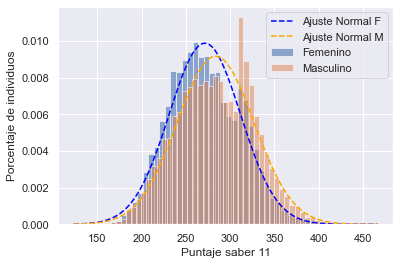

In [3]:
# Separa población entre hombres y mujeres
mujeres = df.loc[df['mujer'] == 1]
hombres = df.loc[df['mujer'] == 0]

# Ajustamos una normal a los puntajes del saber11
muMujer, stdMujer = sp.norm.fit(mujeres["puntaje_saber11"])
muHombre, stdHombre = sp.norm.fit(hombres["puntaje_saber11"])

# Realizamos un histograma entre ambas poblaciones
sns.set()
plt.hist(mujeres["puntaje_saber11"], bins=50, density=True, alpha=0.6, label = 'Femenino')
plt.hist(hombres["puntaje_saber11"], bins=50, density=True, alpha=0.5, label = 'Masculino')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pMujer = sp.norm.pdf(x, muMujer, stdMujer)
pHombre = sp.norm.pdf(x, muHombre, stdHombre)
plt.plot(x, pMujer, 'k', linewidth=1.5, c= 'blue', ls='--' ,label='Ajuste Normal F')
plt.plot(x, pHombre, 'k', linewidth=1.5, c = 'orange', ls='--' ,label = 'Ajuste Normal M')
plt.xlabel("Puntaje saber 11")
plt.ylabel("Porcentaje de individuos")
plt.legend()
plt.show()

## Modelo lineal

In [6]:
X1 = df.drop(['puntaje_saber11','mujer*edad', 'mujer*minoria', 'mujer*beneficiario_spp', 'mujer*miembros_familia', 'mujer*col_privado', 'mujer*icfes_educ_madre',
       'mujer*estrato'], axis=1)
X2 = df.drop('puntaje_saber11',axis=1)
Y = df['puntaje_saber11']

# Dos modelos a comparar
modelo1 = LinearRegression()
modelo2 = LinearRegression()
modelo1.fit(X1, Y);
modelo2.fit(X2, Y);

In [18]:
# Coeficientes de ambos modelos
print('Modelo 1: \n','Intercept:', modelo1.intercept_, '\n Coefficients:', modelo1.coef_, '\n R2:', modelo1.score(X1,Y))
print('\n','Modelo 2: \n','Intercept:', modelo2.intercept_, '\n Coefficients:', modelo2.coef_, '\n R2:', modelo2.score(X2,Y))

Modelo 1: 
 Intercept: 291.73926229589335 
 Coefficients: [-6.33999784 -2.15604183 -7.28723308 64.97725975 -0.89884598 -0.53340165
  2.83673223  5.44613701] 
 R2: 0.46984177519708925

 Modelo 2: 
 Intercept: 290.4424426184969 
 Coefficients: [-3.84884478e+00 -1.96650914e+00 -8.12858832e+00  6.40283589e+01
 -1.01589383e+00 -1.15333806e+00  2.47799378e+00  5.40988889e+00
 -3.50715892e-01  1.48558317e+00  2.00681681e+00  2.17280521e-01
  1.18080306e+00  6.46074868e-01  3.70622741e-02] 
 R2: 0.47013571976269963


In [8]:
print('Hay una disminución porcentual en el sesgo del', np.abs((modelo2.coef_[0]-modelo1.coef_[0])/modelo1.coef_[0]))

Hay una disminución porcentual en el sesgo del 0.3929264837112647


In [7]:
X2.columns

Index(['mujer', 'edad', 'minoria', 'beneficiario_spp', 'miembros_familia',
       'col_privado', 'icfes_educ_madre', 'estrato', 'mujer*edad',
       'mujer*minoria', 'mujer*beneficiario_spp', 'mujer*miembros_familia',
       'mujer*col_privado', 'mujer*icfes_educ_madre', 'mujer*estrato'],
      dtype='object')

## Cálculos Adicionales

Podemos estudiar por separado el sesgo de género entre colegios públicos y privados

In [9]:
colPrivado = (df.loc[df['col_privado']==1]).drop(['col_privado'], axis=1)
colPublico = (df.loc[df['col_privado']==0]).drop(['col_privado'], axis=1)
mujeresPriv = df.loc[(df['mujer'] == 1) & (df['col_privado']==1)]
hombresPriv = df.loc[(df['mujer'] == 0) & (df['col_privado']==1)]
mujeresPubli = df.loc[(df['mujer'] == 1) & (df['col_privado']==0)]
hombresPubli = df.loc[(df['mujer'] == 0) & (df['col_privado']==0)]

print("Mujeres colegio privado \n Promedio: ", mujeresPriv["puntaje_saber11"].mean(), "\n Std :", mujeresPriv["puntaje_saber11"].std())
print("Hombres colegio privado \n Promedio: ", hombresPriv["puntaje_saber11"].mean(),"\n Std :", hombresPriv["puntaje_saber11"].std())
print("Mujeres colegio público \n Promedio: ", mujeresPubli["puntaje_saber11"].mean(), "\n Std :", mujeresPubli["puntaje_saber11"].std())
print("Hombres colegio público \n Promedio: ", hombresPubli["puntaje_saber11"].mean(),"\n Std :", hombresPubli["puntaje_saber11"].std())

Mujeres colegio privado 
 Promedio:  278.93707790669544 
 Std : 44.064836486398406
Hombres colegio privado 
 Promedio:  287.3766426758333 
 Std : 46.6675390008942
Mujeres colegio público 
 Promedio:  269.9119084542361 
 Std : 39.29242116566044
Hombres colegio público 
 Promedio:  282.79075218365875 
 Std : 42.63350694937169


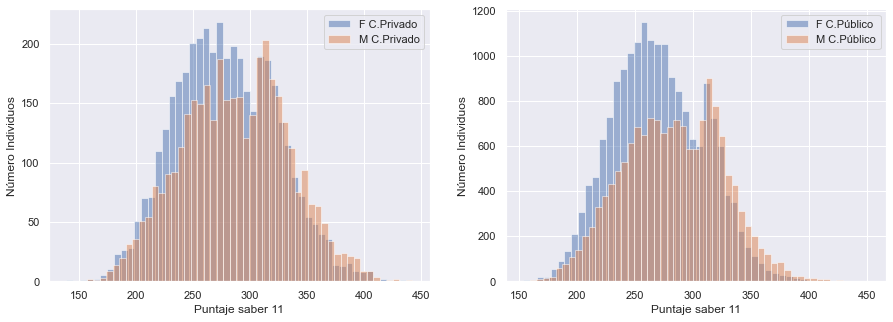

In [20]:
f, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].hist(mujeresPriv["puntaje_saber11"], bins=50, alpha=0.5, label = 'F C.Privado')
ax[0].hist(hombresPriv["puntaje_saber11"], bins=50, alpha=0.5, label = 'M C.Privado')
ax[1].hist(mujeresPubli["puntaje_saber11"], bins=50, alpha=0.5, label = 'F C.Público')
ax[1].hist(hombresPubli["puntaje_saber11"], bins=50, alpha=0.5, label = 'M C.Público')
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel("Puntaje saber 11")
ax[0].set_ylabel("Número Individuos")
ax[1].set_xlabel("Puntaje saber 11")
ax[1].set_ylabel("Número Individuos")
plt.show()

Vemos que la diferencia entre las medias de ambas poblaciones se ve afectada significativamente, así podemos conllevar el estudio anterior para colegios públicos y privados por separado.

In [11]:
#Para colegio privado
X1Priv = colPrivado.drop(['puntaje_saber11','mujer*edad', 'mujer*minoria', 'mujer*beneficiario_spp', 'mujer*miembros_familia', 'mujer*col_privado', 'mujer*icfes_educ_madre',
       'mujer*estrato'], axis=1)
X2Priv = colPrivado.drop('puntaje_saber11',axis=1)
YPriv = colPrivado['puntaje_saber11']

# Dos modelos a comparar
modelo1Priv = LinearRegression()
modelo2Priv = LinearRegression()
modelo1Priv.fit(X1Priv, YPriv);
modelo2Priv.fit(X2Priv, YPriv);

#Coeficientes de ambos modelos
print('Modelo 1 Priv: \n','Intercept:', modelo1Priv.intercept_, '\n Coefficients:', modelo1Priv.coef_, '\n R2:', modelo1Priv.score(X1Priv,YPriv))
print('\n','Modelo 2 Priv: \n','Intercept:', modelo2Priv.intercept_, '\n Coefficients:', modelo2Priv.coef_, '\n R2:', modelo2Priv.score(X2Priv,YPriv))

Modelo 1 Priv: 
 Intercept: 279.28740845308096 
 Coefficients: [-5.11244295 -1.92876356 -5.67783441 66.0839632  -0.54954004  5.34292863
  5.10770378] 
 R2: 0.49026112679602596

 Modelo 2 Priv: 
 Intercept: 281.6376170304757 
 Coefficients: [-4.56428319e+00 -1.92641959e+00 -7.24097387e+00  6.60371116e+01
 -4.99484316e-01  5.36879381e+00  3.96491219e+00 -1.79194959e-02
  3.03730120e+00 -9.91118392e-02 -1.26636324e-01 -4.56428319e+00
 -5.47185339e-02  2.15064282e+00] 
 R2: 0.49072643328698473


In [12]:
#Para colegio publico
X1Publi = colPublico.drop(['puntaje_saber11','mujer*edad', 'mujer*minoria', 'mujer*beneficiario_spp', 'mujer*miembros_familia', 'mujer*col_privado', 'mujer*icfes_educ_madre',
       'mujer*estrato'], axis=1)
X2Publi = colPublico.drop('puntaje_saber11',axis=1)
YPubli = colPublico['puntaje_saber11']

# Dos modelos a comparar
modelo1Publi = LinearRegression()
modelo2Publi = LinearRegression()
modelo1Publi.fit(X1Publi, YPubli);
modelo2Publi.fit(X2Publi, YPubli);

#Coeficientes de ambos modelos
print('Modelo 1 Publi: \n','Intercept:', modelo1Publi.intercept_, '\n Coefficients:', modelo1Publi.coef_, '\n R2:', modelo1Publi.score(X1Publi,YPubli))
print('\n','Modelo 2 Publi: \n','Intercept:', modelo2Publi.intercept_, '\n Coefficients:', modelo2Publi.coef_, '\n R2:', modelo2Publi.score(X2Publi,YPubli))

Modelo 1 Publi: 
 Intercept: 294.8662246979774 
 Coefficients: [-6.63951587 -2.22144777 -7.52714356 64.57115498 -0.97567782  2.16468087
  5.43569145] 
 R2: 0.46229289400870677

 Modelo 2 Publi: 
 Intercept: 291.3258539369319 
 Coefficients: [ 1.81701860e-01 -1.90839592e+00 -8.27326516e+00  6.33757425e+01
 -1.13918563e+00  1.65820276e+00  5.76713876e+00 -5.89571421e-01
  1.29168570e+00  2.58828482e+00  2.97268968e-01 -7.10542736e-15
  8.98689819e-01 -6.27486103e-01] 
 R2: 0.46273138400894676


En los colegios públicos, quitando los factores sociales que nos permiten los datos, a las mujeres les va mejor que a los hombres en las pruebas Saber11